# Analyze Question Types

In [5]:
! tree ../output_results/

../output_results/
├── CoT
│   ├── LLM_classified_results.csv
│   ├── LLM_consistency_eval_results.csv
│   ├── LLM_human_question_labels_classified.csv
│   ├── QA_Seq_LLM_generated.csv
│   └── old
│       ├── v1_LLM_classified_results.csv
│       └── v2_LLM_classified_results.csv
├── CoT_outline
│   ├── LLM_classified_results.csv
│   ├── LLM_consistency_eval_results.csv
│   ├── LLM_human_question_labels_classified.csv
│   ├── QA_Seq_LLM_generated.csv
│   └── old
│       ├── v1_LLM_classified_results.csv
│       └── v2_LLM_classified_results.csv
├── baseline
│   ├── LLM_classified_results.csv
│   ├── LLM_consistency_eval_results.csv
│   ├── LLM_human_question_labels_classified.csv
│   ├── QA_Seq_LLM_generated.csv
│   └── old
│       ├── v1_LLM_classified_results.csv
│       └── v2_LLM_classified_results.csv
├── consistency_eval_test
│   └── LLM_consistency_eval_results_multidimensional.jsonl
├── game_sim
│   ├── conducted_interviews_basic
│   │   └── interviewer-70B-vs-source-70B
│   │ 

## Analysis on the overall results

In [8]:
import pandas as pd 
df_baseline = pd.read_csv('../output_results/baseline/LLM_classified_results.csv')
df_outline = pd.read_csv('../output_results/outline/LLM_classified_results.csv')
df_cot = pd.read_csv('../output_results/CoT/LLM_classified_results.csv')
df_cot_outline = pd.read_csv('../output_results/CoT_outline/LLM_classified_results.csv')

In [150]:
to_keep = [
    'Follow-Up Question',
    'Outline-Level Question',
    'Acknowledgement Statement',
    'Opinion/Speculation Question',
    'Broadening Question',
    'Verification Question',
    'Challenge Question',
]

to_keep_lower = list(map(lambda x: x.lower(), to_keep))

In [48]:
full_colset = [
 'Human',
 'Baseline',
 'Outline',
 'CoT',
 'CoT with "Guessed Question" dropped',
 'CoT-Outline',
 'CoT-Outline with "Guessed Question" dropped'
]
cols_to_use = [
 'Human',
 'Baseline',
 'Outline',
 'CoT with "Guessed Question" dropped',
 'CoT-Outline with "Guessed Question" dropped'
]

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Follow-Up Question'),
  Text(1, 0, 'Outline-Level Question'),
  Text(2, 0, 'Acknowledgement Statement'),
  Text(3, 0, 'Opinion/Speculation Question'),
  Text(4, 0, 'Broadening Question'),
  Text(5, 0, 'Verification Question'),
  Text(6, 0, 'Challenge Question')])

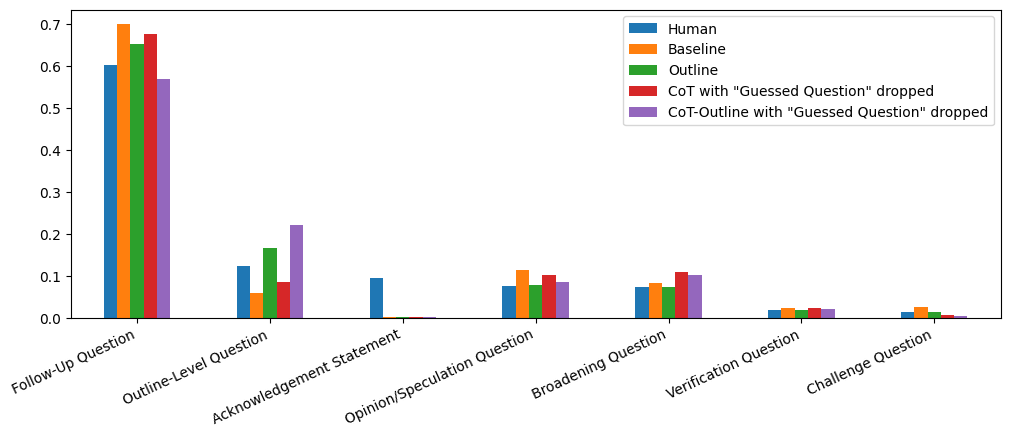

In [49]:
import matplotlib.pyplot as plt
all_trials_df = pd.concat([
    (df_baseline['Actual_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('Human')
       ),
    (df_baseline['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('Baseline')
      ),
    (df_outline['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('Outline')
      ),
    (df_cot['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('CoT')
      ),
    (df_cot
         .loc[lambda df: df['LLM_Question'] != 'Guessed Question']
         ['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('CoT with "Guessed Question" dropped')
      ),    
    (df_cot_outline['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('CoT-Outline')
      ),
    (df_cot_outline
         .loc[lambda df: df['LLM_Question'] != 'Guessed Question']
         ['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('CoT-Outline with "Guessed Question" dropped')
      ),
], axis=1)
all_trials_df[cols_to_use].plot(kind='bar', figsize=(12, 4))
plt.xticks(rotation=25, horizontalalignment='right')

In [77]:
import ast
final_dataset = pd.read_csv('../data/final_dataset.csv')
final_dataset['utt'] = final_dataset['utt'].apply(ast.literal_eval)

In [71]:
t = df_baseline['Actual_Question'].iloc[0]

In [ ]:
# final_dataset.loc[lambda df: df['combined_dialogue'].str.contains(t)][['utt', ]]
# interviews_with_location = (
#     df_baseline
#     .assign(actual_question_parsed=lambda df: df['Actual_Question'].str.split(':').str.get(-1).str.strip())
#     .merge(final_dataset[['id','utt']]
#     ).assign(q_loc=lambda df: 
#         df.apply(lambda x: x['utt'].index(x['actual_question_parsed']) if x['actual_question_parsed'] in x['utt'] else -1, axis=1)
#              .pipe(lambda s: (s/2).astype(int))
#     )
#     .drop(columns='actual_question_parsed')
# )

In [165]:
to_keep_for_timeseries = [
    'Follow-Up Question',
    'Outline-Level Question',
    'Acknowledgement Statement',
    'Opinion/Speculation Question',
    'Broadening Question',
    'Verification Question',
    'Challenge Question',
    # 'Starting/Ending Remarks'
]

to_keep_for_timeseries_lower = list(map(lambda x: x.lower(), to_keep_for_timeseries))

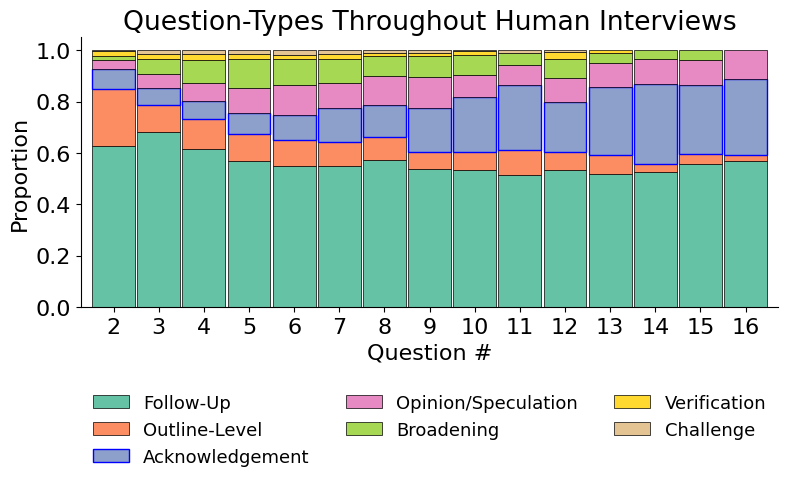

In [561]:
question_distribution_by_turn = (
    df_baseline
         [['k (num qa_pairs)', 'Actual_Question_Type']]
         .assign(Actual_Question_Type=lambda df: df['Actual_Question_Type'].str.split(', '))
         .explode('Actual_Question_Type')
         .assign(Actual_Question_Type=lambda df: df['Actual_Question_Type'].str.lower().str.strip())
         .assign(c=1)
         .rename(columns={'Actual_Question_Type': 'Question Category'})
         .groupby(['Question Category', 'k (num qa_pairs)'])
         ['c'].sum()
         .unstack()
         .loc[to_keep_for_timeseries_lower, :15]
         .T
         .pipe(lambda df: df.divide(df.sum(axis=1), axis=0))
         .rename(columns=lambda x: x.title())
)

plt.rc('font',size=16)
ax = (
    question_distribution_by_turn
    .loc[:, to_keep]
    .rename(index=lambda x: x+1)
    .rename(columns=lambda x: x.split()[0])
     .plot(kind='bar', stacked=True, 
           color=colors,
           # colormap='Set2',
           width=.95, figsize=(9, 3.5),
           edgecolor='black',
           linewidth=.5
          )
)

# Highlight the "Acknowledgement Statement" segment with a thick border
ack_color = color_map["Acknowledgement Statement"]
for bar in ax.patches:
    # Find the bars corresponding to "Acknowledgement Statement"
    if tuple(bar.get_facecolor())[:3] == tuple(ack_color)[:3]:
        bar.set_edgecolor('blue')  # Set border color to black
        bar.set_linewidth(1)  # Set border thickness


legend = ax.legend(
    ncol=3, 
    frameon=False, 
    facecolor='white', 
    framealpha=1, 
    loc='lower center',
    fontsize=13,
    bbox_to_anchor=(.5, -.65),   
)#.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# legend.get_frame().set_facecolor('white')
plt.xlabel('Question #')
plt.ylabel('Proportion')
plt.title('Question-Types Throughout Human Interviews')
plt.xticks(rotation=0)
# plt.savefig('../latex/figures/question_types_over_time_sans_legend.png', bbox_inches='tight')
plt.savefig('../latex/figures/question_types_over_time.png', bbox_inches='tight')

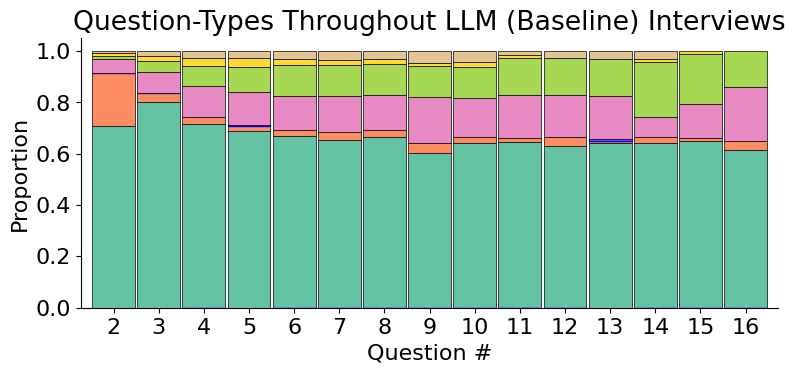

In [557]:
question_distribution_by_turn = (
    df_baseline
         [['k (num qa_pairs)', 'LLM_Question_Type']]
         .rename(columns={'LLM_Question_Type': 'Question Category'})     
         .assign(**{'Question Category':lambda df: df['Question Category'].str.split(', ')})
         .explode('Question Category')
         .assign(**{'Question Category':lambda df: df['Question Category'].str.lower().str.strip()})
         .assign(c=1)
         .groupby(['Question Category', 'k (num qa_pairs)'])
         ['c'].sum()
         .unstack()
         .loc[to_keep_for_timeseries_lower, :15]
         .T
         .pipe(lambda df: df.divide(df.sum(axis=1), axis=0))
         .rename(columns=lambda x: x.title())
)

plt.rc('font',size=16)
ax = (
    question_distribution_by_turn
    .loc[:, to_keep]
    .rename(index=lambda x: x+1)
    .rename(columns=lambda x: x.split()[0])
     .plot(kind='bar', stacked=True, 
           color=colors,
           # colormap='Set2',
           width=.95, figsize=(9, 3.5),
           edgecolor='black',
           linewidth=.5
          )
)

# Highlight the "Acknowledgement Statement" segment with a thick border
ack_color = color_map["Acknowledgement Statement"]
for bar in ax.patches:
    # Find the bars corresponding to "Acknowledgement Statement"
    if tuple(bar.get_facecolor())[:3] == tuple(ack_color)[:3]:
        bar.set_edgecolor('blue')  # Set border color to black
        bar.set_linewidth(1)  # Set border thickness


legend = ax.legend(
    ncol=3, 
    frameon=False, 
    facecolor='white', 
    framealpha=1, 
    loc='lower center',
    fontsize=13,
    bbox_to_anchor=(.5, -.65),   
).set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# legend.get_frame().set_facecolor('white')
plt.xlabel('Question #')
plt.ylabel('Proportion')
plt.title('Question-Types Throughout LLM (Baseline) Interviews')
plt.xticks(rotation=0)
plt.savefig('../latex/figures/question_types_over_time_sans_legend__baseline.png', bbox_inches='tight')
# plt.savefig('../latex/figures/question_types_over_time__baseline_llm.png', bbox_inches='tight')

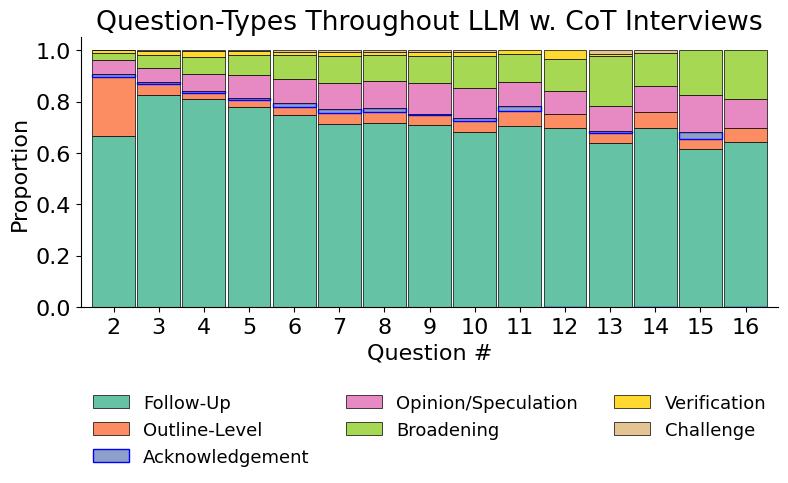

In [555]:
question_distribution_by_turn = (
    df_cot
         [['k (num qa_pairs)', 'LLM_Question_Type']]
         .rename(columns={'LLM_Question_Type': 'Question Category'})     
         .assign(**{'Question Category':lambda df: df['Question Category'].str.split(', ')})
         .explode('Question Category')
         .assign(**{'Question Category':lambda df: df['Question Category'].str.lower().str.strip()})
         .assign(c=1)
         .groupby(['Question Category', 'k (num qa_pairs)'])
         ['c'].sum()
         .unstack()
         .loc[to_keep_for_timeseries_lower, :15]
         .T
         .pipe(lambda df: df.divide(df.sum(axis=1), axis=0))
         .rename(columns=lambda x: x.title())
)

plt.rc('font',size=16)
ax = (
    question_distribution_by_turn
    .loc[:, to_keep]
    .rename(index=lambda x: x+1)
    .rename(columns=lambda x: x.split()[0])
     .plot(kind='bar', stacked=True, 
           color=colors,
           # colormap='Set2',
           width=.95, figsize=(9, 3.5),
           edgecolor='black',
           linewidth=.5
          )
)

# Highlight the "Acknowledgement Statement" segment with a thick border
ack_color = color_map["Acknowledgement Statement"]
for bar in ax.patches:
    # Find the bars corresponding to "Acknowledgement Statement"
    if tuple(bar.get_facecolor())[:3] == tuple(ack_color)[:3]:
        bar.set_edgecolor('blue')  # Set border color to black
        bar.set_linewidth(1)  # Set border thickness


legend = ax.legend(
    ncol=3, 
    frameon=False, 
    facecolor='white', 
    framealpha=1, 
    loc='lower center',
    fontsize=13,
    bbox_to_anchor=(.5, -.65),   
)#.set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# legend.get_frame().set_facecolor('white')
plt.xlabel('Question #')
plt.ylabel('Proportion')
plt.title('Question-Types Throughout LLM w. CoT Interviews')
plt.xticks(rotation=0)
# plt.savefig('../latex/figures/question_types_over_time_sans_legend.png', bbox_inches='tight')
plt.savefig('../latex/figures/question_types_over_time__cot_llm.png', bbox_inches='tight')

In [306]:
all_trials_df_for_pies = all_trials_df.loc[to_keep, cols_to_use].rename(columns=lambda x: x.split(' with')[0])

In [248]:
pie_plots = [
    'Human',
    'Baseline',
    'Outline',
    'CoT-Outline with "Guessed Question" dropped'
]

In [258]:
from adjustText import adjust_text

In [486]:
order = ['Follow-Up Question',
'Outline-Level Question',
'Acknowledgement Statement',
'Opinion/Speculation',
'Broadening Question',
'Verification Question',
'Challenge Question',
    ]

In [478]:
color_map = {
    'Follow-Up Question': plt.cm.Set2.colors[0],  # Light Green
    'Outline-Level Question': plt.cm.Set2.colors[1],  # Orange
    'Acknowledgement Statement': plt.cm.Set2.colors[2],  # Light Blue
    'Opinion/Speculation Question': plt.cm.Set2.colors[3],  # Pink
    'Broadening Question': plt.cm.Set2.colors[4],  # Light Purple
    'Verification Question': plt.cm.Set2.colors[5],  # Beige
    'Challenge Question': plt.cm.Set2.colors[6]  # Light Brown
}

# Generate colors for the pie charts based on the question type
colors = [color_map[label] for label in all_trials_df_for_pies.index]

In [479]:
less_columns = ['Human', 'Baseline']

In [480]:
col_names = {
    'Human': 'Human',
    'Baseline': 'LLM'
}

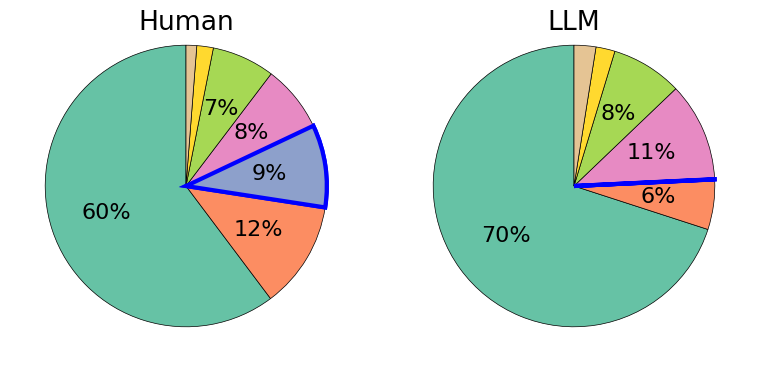

In [481]:
import numpy as np

def autopct_format(pct):
    return f'{pct:.0f}%' if pct >= 5 else ''

fig, axes = plt.subplots(1, int(len(pie_plots) / 2), figsize=(8, 4))

for i, (col, ax) in enumerate(zip(less_columns, axes.flatten())):
    wedges, texts, autotexts = ax.pie(
        all_trials_df_for_pies[col], 
        colors=colors[:len(all_trials_df_for_pies)], 
        startangle=90, 
        autopct=autopct_format
    )
    
    # Highlight the "Acknowledgement Statement" slice with a thick border
    for j, wedge in enumerate(wedges):
        wedge.set_edgecolor('black')  # Set border color to black
        wedge.set_linewidth(.5)  # Set border thickness


    ack_index = all_trials_df_for_pies.index.get_loc("Acknowledgement Statement")

    # Remove the "Acknowledgement Statement" slice from wedges
    ack_wedge = wedges.pop(ack_index)

    # Redraw the "Acknowledgement Statement" slice last to bring it to the front
    ax.add_patch(ack_wedge)  # Add it back as the last patch
    ack_wedge.set_edgecolor('blue')  # Set border color to black
    ack_wedge.set_linewidth(3)  # Set border thickness
    
    # rotate_text(autotexts, wedges)
    ax.set_title(col_names[col.split(' with')[0]], y=.92)
    # Create a list of texts to be adjusted
    all_texts = autotexts

    # Adjust the text to avoid overlap
    # adjust_text(all_texts, ax=ax, force_text=(.01, .01))

# Create a shared legend for all pie charts
# fig.legend(wedges, all_trials_df.index, loc='center right', title='Question Type', bbox_to_anchor=(1.2, 0.5))

# Adjust layout
plt.tight_layout()
# plt.show()
plt.savefig('../latex/figures/pie_charts.png', bbox_inches='tight')

In [498]:
col_names = {
    'Human': 'Human',
    'Baseline': 'Baseline-LLM',
    'CoT': 'LLM w. CoT',
    'Outline': 'LLM w. Outline',
}

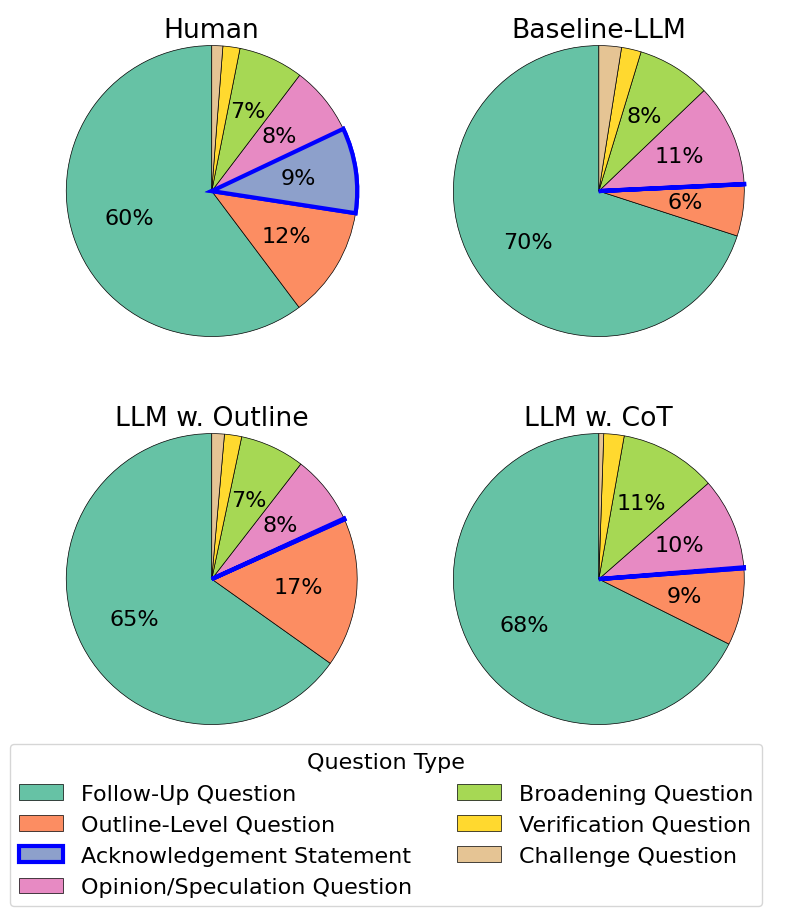

In [518]:
import numpy as np
def rotate_text(autopct, wedges):
    for text, wedge in zip(autopct, wedges):
        angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
        x, y = np.cos(np.radians(angle)), np.sin(np.radians(angle))
        rotation = angle if angle <= 180 else angle - 360
        text.set_rotation(rotation)
        text.set_ha('center')
        text.set_va('center')

# Adjusted plotting function with a shared legend and no individual pie chart labels
fig, axes = plt.subplots(2, int(len(pie_plots) / 2), figsize=(8, 8))
# colors = plt.cm.Set2.colors

def autopct_format(pct):
    return f'{pct:.0f}%' if pct >= 5 else ''

# Plot pie charts without individual labels
for i, (col, ax) in enumerate(zip(all_trials_df_for_pies.columns, axes.flatten())):
    wedges, texts, autotexts = ax.pie(
        all_trials_df_for_pies[col], 
        colors=colors, 
        startangle=90, 
        autopct=autopct_format
    )
    
    # Highlight the "Acknowledgement Statement" slice with a thick border
    for j, wedge in enumerate(wedges):
        wedge.set_edgecolor('black')  # Set border color to black
        wedge.set_linewidth(.5)  # Set border thickness


    ack_index = all_trials_df_for_pies.index.get_loc("Acknowledgement Statement")

    # Remove the "Acknowledgement Statement" slice from wedges
    ack_wedge = wedges.pop(ack_index)

    # Redraw the "Acknowledgement Statement" slice last to bring it to the front
    ax.add_patch(ack_wedge)  # Add it back as the last patch
    ack_wedge.set_edgecolor('blue')  # Set border color to black
    ack_wedge.set_linewidth(3)  # Set border thickness
    wedges = wedges[:ack_index] + [ack_wedge] + wedges[ack_index:]
    
    # rotate_text(autotexts, wedges)
    ax.set_title(col_names[col.split(' with')[0]], y=.9)
    # Create a list of texts to be adjusted
    all_texts = autotexts

    # Adjust the text to avoid overlap
    # adjust_text(all_texts, ax=ax, force_text=(.01, .01))

# Create a shared legend for all pie charts
fig.legend(wedges, all_trials_df.index, loc='center right', title='Question Type', ncols=2, bbox_to_anchor=(.96, -.05),  )
# fig.legend(wedges, all_trials_df.index, loc='center right', title='Question Type', bbox_to_anchor=(.7, -.1),  )

# Adjust layout
plt.tight_layout()
plt.savefig('../latex/figures/pie_charts_full.png', bbox_inches='tight')

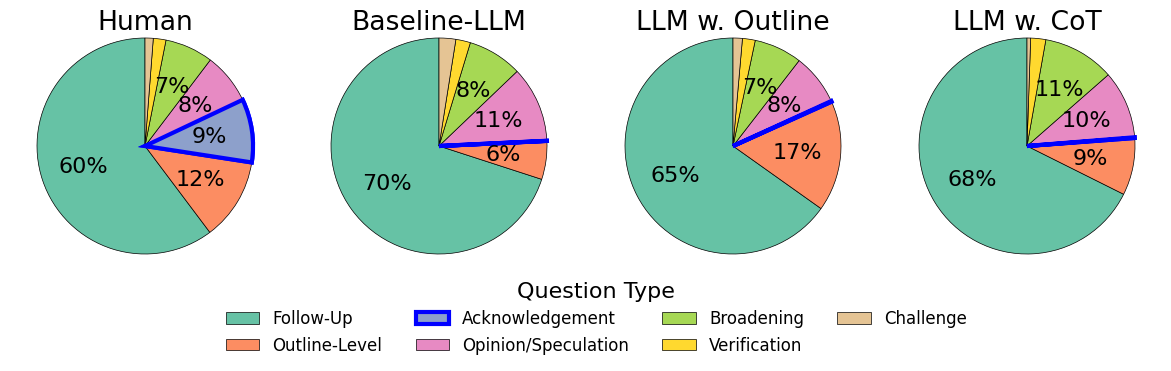

In [526]:
import numpy as np
def autopct_format(pct):
    return f'{pct:.0f}%' if pct >= 5 else ''


fig, axes = plt.subplots(1, int(len(pie_plots)), figsize=(12, 4))

# Plot pie charts without individual labels
for i, (col, ax) in enumerate(zip(all_trials_df_for_pies.columns, axes.flatten())):
    wedges, texts, autotexts = ax.pie(
        all_trials_df_for_pies[col].rename(lambda x: x.split()[0]),
        colors=colors[:len(all_trials_df_for_pies)], 
        startangle=90, 
        autopct=autopct_format
    )
    
    # Highlight the "Acknowledgement Statement" slice with a thick border
    for j, wedge in enumerate(wedges):
        wedge.set_edgecolor('black')  # Set border color to black
        wedge.set_linewidth(.5)  # Set border thickness


    ack_index = all_trials_df_for_pies.index.get_loc("Acknowledgement Statement")

    # Remove the "Acknowledgement Statement" slice from wedges
    ack_wedge = wedges.pop(ack_index)

    # Redraw the "Acknowledgement Statement" slice last to bring it to the front
    ax.add_patch(ack_wedge)  # Add it back as the last patch
    ack_wedge.set_edgecolor('blue')  # Set border color to black
    ack_wedge.set_linewidth(3)  # Set border thickness
    wedges = wedges[:ack_index] + [ack_wedge] + wedges[ack_index:]
    # rotate_text(autotexts, wedges)
    ax.set_title(col_names[col.split(' with')[0]], y=.9)
    # Create a list of texts to be adjusted
    all_texts = autotexts
    
    # Adjust the text to avoid overlap
    # adjust_text(all_texts, ax=ax, force_text=(.01, .01))

# Create a shared legend for all pie charts
fig.legend(
    wedges, 
    list(map(lambda x: x.split()[0], all_trials_df.index.tolist())), 
    loc='center right', 
    title='Question Type', 
    ncols=4, 
    frameon=False,
    fontsize=12,
    bbox_to_anchor=(.83,.07),  
)
# fig.legend(wedges, all_trials_df.index, loc='center right', title='Question Type', bbox_to_anchor=(.7, -.1),  )

# Adjust layout
plt.tight_layout()
plt.savefig('../latex/figures/pie_charts_full_4_col.png', bbox_inches='tight')

In [237]:
# plt.pie(all_trials_df['Human'], labels=to_keep_for_timeseries, autopct='%1.1f%%')#, colormap='tab20')

## Analyze the results on the task dataset

In [37]:
ls ../output_results/task_datasets/

CoT_LLM_classified_results.csv          baseline_LLM_classified_results.csv
CoT_outline_LLM_classified_results.csv  outline_LLM_classified_results.csv


In [38]:
import pandas as pd 
df_task_baseline = pd.read_csv('../output_results/task_datasets/baseline_LLM_classified_results.csv')
df_task_outline = pd.read_csv('../output_results/task_datasets/outline_LLM_classified_results.csv')
df_task_cot = pd.read_csv('../output_results/task_datasets/CoT_LLM_classified_results.csv')
df_task_cot_outline = pd.read_csv('../output_results/task_datasets/CoT_outline_LLM_classified_results.csv')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Follow-Up Question'),
  Text(1, 0, 'Outline-Level Question'),
  Text(2, 0, 'Acknowledgement Statement'),
  Text(3, 0, 'Opinion/Speculation Question'),
  Text(4, 0, 'Broadening Question'),
  Text(5, 0, 'Verification Question'),
  Text(6, 0, 'Challenge Question')])

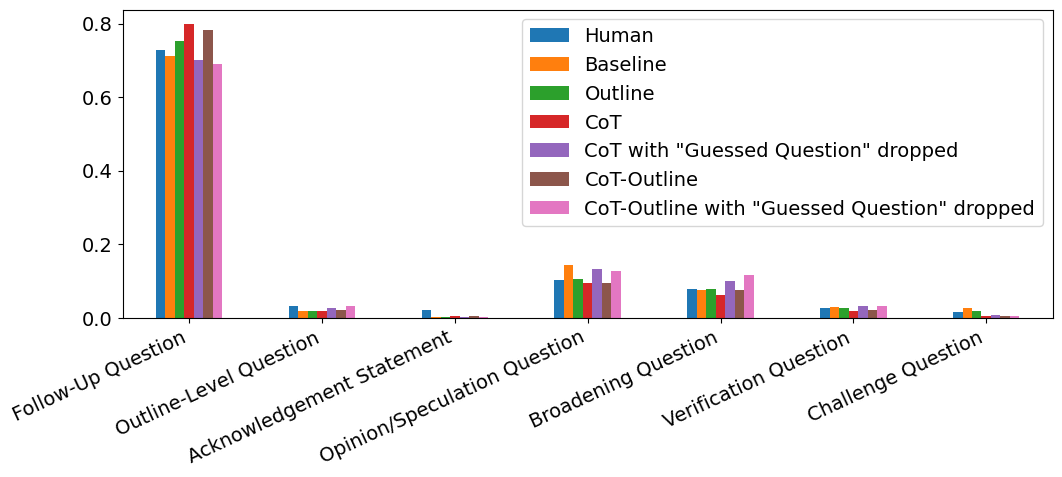

In [220]:
import matplotlib.pyplot as plt
full_df = pd.concat([
    (df_task_baseline['Actual_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('Human')
       ),
    (df_task_baseline['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('Baseline')
      ),
    (df_task_outline['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('Outline')
      ),
    (df_task_cot['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('CoT')
      ),
    (df_task_cot
         .loc[lambda df: df['LLM_Question'] != 'Guessed Question']
         ['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('CoT with "Guessed Question" dropped')
      ),    
    (df_task_cot_outline['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('CoT-Outline')
      ),
    (df_task_cot_outline
         .loc[lambda df: df['LLM_Question'] != 'Guessed Question']
         ['LLM_Question_Type']
         .str.split(', ').explode().value_counts().loc[to_keep]
         .pipe(lambda s: s/s.sum())
         .to_frame('CoT-Outline with "Guessed Question" dropped')
      ),
], axis=1)
full_df.plot(kind='bar', figsize=(12, 4))
plt.xticks(rotation=25, horizontalalignment='right')

# Analyze Consistency

In [427]:
eval_cot_outline = pd.read_json('../output_results/consistency_eval_cot_outline/LLM_consistency_eval_results_multidimensional.jsonl', lines=True)
eval_cot = pd.read_json('../output_results/consistency_eval_cot/LLM_consistency_eval_results_multidimensional.jsonl', lines=True)
eval_outline = pd.read_json('../output_results/consistency_eval_outline/LLM_consistency_eval_results_multidimensional.jsonl', lines=True)
eval_baseline = pd.read_json('../output_results/consistency_eval_baseline/LLM_consistency_eval_results_multidimensional.jsonl', lines=True)

In [428]:
cot_outline_consistency = (
    eval_cot_outline['Classified_Similarity']
    .pipe(lambda df: pd.DataFrame(df.to_list()))
    .assign(Discourse=eval_cot_outline.pipe(lambda df: df['Actual_Question_Type'] == df['LLM_Question_Type']).mean())
    .mean()
    .rename({'Overall': 'Exact Match'})
)
cot_consistency = (
    eval_cot['Classified_Similarity']
    .pipe(lambda df: pd.DataFrame(df.to_list()))
    .assign(Discourse=eval_cot.pipe(lambda df: df['Actual_Question_Type'] == df['LLM_Question_Type']).mean())
    .mean()
    .rename({'Overall': 'Exact Match'})
)
outline_consistency = (
    eval_outline['Classified_Similarity']
    .pipe(lambda df: pd.DataFrame(df.to_list()))
    .assign(Discourse=eval_outline.pipe(lambda df: df['Actual_Question_Type'] == df['LLM_Question_Type']).mean())
    .mean()
    .rename({'Overall': 'Exact Match'})
)
baseline_consistency = (
    eval_baseline['Classified_Similarity']
    .pipe(lambda df: pd.DataFrame(df.to_list()))
    .assign(Discourse=eval_outline.pipe(lambda df: df['Actual_Question_Type'] == df['LLM_Question_Type']).mean())
    .mean()
    .rename({'Overall': 'Exact Match'})
)

In [535]:
consistency_table = pd.concat([
    baseline_consistency.sort_values().to_frame('Baseline-LLm'),
    cot_consistency.sort_values().to_frame('Chain-of-Thought (CoT)'),
    outline_consistency.sort_values().to_frame('LLM w. Outline'),
    cot_outline_consistency.sort_values().to_frame('Outline-CoT'),
], axis=1).T.pipe(lambda s: s*100).round(1)[[
    'Exact Match', 
    'Informational', 
    'Motivational', 
    'Stylistic', 
    'Discourse',
    'Contextual'
]]

In [540]:
print(consistency_table.to_latex(float_format="%.1f"))

\begin{tabular}{lrrrrrr}
\toprule
 & Exact Match & Informational & Motivational & Stylistic & Discourse & Contextual \\
\midrule
Baseline-LLm & 3.9 & 4.4 & 4.7 & 11.9 & 36.2 & 53.0 \\
Chain-of-Thought (CoT) & 4.5 & 3.6 & 5.2 & 12.8 & 37.0 & 56.9 \\
LLM w. Outline & 3.7 & 3.8 & 4.1 & 9.6 & 36.2 & 46.6 \\
Outline-CoT & 3.6 & 3.9 & 4.3 & 8.3 & 29.9 & 43.1 \\
\bottomrule
\end{tabular}

